# **Stock Market Prediction**
In this code I have used Stacked LSTM (Long Short Term Memory) Model to Predict the Stock Price of Apple Company.

In [39]:
#Importing Required Libraries
import pandas as pd
import pandas_datareader as pdr
import numpy as np
from numpy import array
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset
df = pd.read_csv('AAPL.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [3]:
df1 = df.reset_index()['close']
df1.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

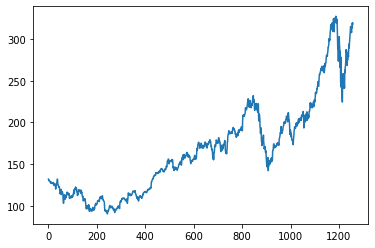

In [4]:
#Plotting on Graph
plt.plot(df1)

In [8]:
#Standardizing the Data since LSTM is sensitive to scale
scaler = MinMaxScaler(feature_range = (0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [10]:
#Splitting the data for Training and Testing
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0 : training_size, : ], df1[training_size : len(df1), : 1]

In [11]:
training_size, test_size 

(817, 441)

In [18]:
#Converting Array to Dataset Matrix
def create_dataset(dataset, time_step = 1):
	dataX, dataY = [], []
	for i in range(len(dataset) - time_step - 1):
		a = dataset[i : (i + time_step), 0] #i = 0 -> 0, 1, 2, 3 ----- 99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [19]:
#Reshaping the Data
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [22]:
#We always need to Reshape the Data for LSTM as it accepts 3 Dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [24]:
#Creating Model Architect
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
#Applying Model
model.fit(X_train, y_train, validation_data = (X_test, ytest), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
12/12 [==============================] - 11s 340ms/step - loss: 0.0159 - val_loss: 0.0598
Epoch 2/100
12/12 [==============================] - 3s 215ms/step - loss: 0.0030 - val_loss: 0.0045
Epoch 3/100
12/12 [==============================] - 3s 214ms/step - loss: 9.5904e-04 - val_loss: 0.0077
Epoch 4/100
12/12 [==============================] - 3s 218ms/step - loss: 8.1437e-04 - val_loss: 0.0040
Epoch 5/100
12/12 [==============================] - 3s 212ms/step - loss: 7.1797e-04 - val_loss: 0.0041
Epoch 6/100
12/12 [==============================] - 3s 216ms/step - loss: 6.5694e-04 - val_loss: 0.0040
Epoch 7/100
12/12 [==============================] - 3s 217ms/step - loss: 6.2341e-04 - val_loss: 0.0039
Epoch 8/100
12/12 [==============================] - 3s 292ms/step - loss: 6.1270e-04 - val_loss: 0.0037
Epoch 9/100
12/12 [==============================] - 3s 230ms/step - loss: 6.4709e-04 - val_loss: 0.0036
Epoch 10/100
12/12 [==============================] - 3s 212ms

In [32]:
#Making Prediction
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 42ms/step


In [33]:
#Transforming beack to Original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [34]:
#Checking Accuracy
math.sqrt(mean_squared_error(y_train, train_predict))

0.010850224954940205

In [35]:
math.sqrt(mean_squared_error(ytest, test_predict))

0.02624765700461233

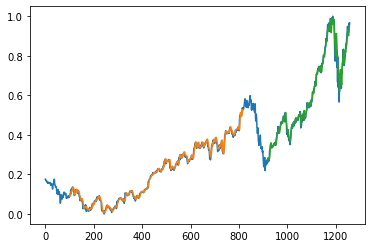

In [36]:
#Plotting in Graph
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[ : , : ] = np.nan
trainPredictPlot[look_back : len(train_predict) + look_back, : ] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[ : , : ] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1 : len(df1) - 1, : ] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In the above graph the Blue line is Actual Data, Orange line is Training Data Prediction and Green line is Test Data Prediction.

In [46]:
len(test_data)

441

Since my calculations are based on previous 100 days, we will go back 100 days i.e. 441 - 100 = 341 for next predictions.

In [37]:
x_input = test_data[341 : ].reshape(1, -1)
x_input.shape

(1, 100)

In [38]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [40]:
#Making Prediction for next 10 days
lst_output = []
n_steps = 100
i = 0
while(i < 30):  
    if(len(temp_input) > 100):
        #print(temp_input)
        x_input = np.array(temp_input[1 : ])
        #print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose = 0)
        #print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1 : ]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

In [41]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [47]:
len(df1)

1258

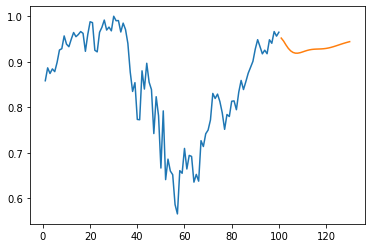

In [42]:
plt.plot(day_new,scaler.inverse_transform(df1[1158 : ]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

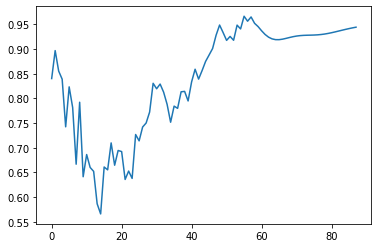

In [43]:
df2 = df1.tolist()
df2.extend(lst_output)
plt.plot(df2[1200 : ])

In [44]:
df2 = scaler.inverse_transform(df2).tolist()

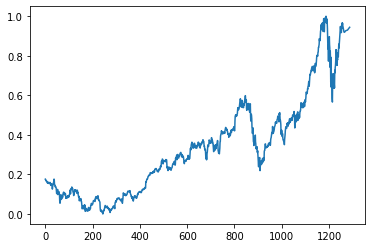

In [45]:
plt.plot(df2)